# Machine Learning Major Project Outline Summary

In this project I use PCA to examine the degree of separability between biologically realistic modeled cell electrical recordings and real electrical recordings from cells.

If biologically realistic models where a better imitation of real experimental cells, then data and models would not be discriminable, by plotting 48 a dimensional feature space we onto 2D projection space, we show that data and models are generally seperable using Random Forest Classifier. The idea is that the models which are the most resistant to being correctly machine-classified as models, serve as better imitations/mimics of experimental data. We also use random forest regression to find out which dimensions explain the most variance, as this will give us a small list of improvements to make to our models, as to make the models better imitations of real daa.

In this project you can see use of:
* PCA, PCA-TSNE dimensionality reduction
* Random Forest Classification (RFC) using 38 features, and also RFC applied to just 2 features (output from PCA).
* using the RFC "variance-explained" feature. 
* Plotting of decision boundary.
* Not done yet, but pending Cross-Validation using looping over many different test/train splits.


### Project Background Introduction:

The Izhikevich model was published with parameter sets believed to pertain to real biological cell types. However since publication much more specific electro physiological recordings have accumulated. Specific knowledge of electrical behavior of real cells has accumulated, and I will refer to this specific data as . When the “Regular Spiking”, neuron category is compared to specific electro-physiological data for pyramidal cells, it is better to optimize against specific data and find a set of model parameters that more accurately reproduce the data. [Introduction Figure](fp_intro.png)

In contrast to other projects that seek to use features to seperate and classify two different categories of things that are hard to tell apart, such that humans can benefit from a fast classification of hard to discern differences in high dimensional spaces. In this project the goal is to use resistance to classification as an indicator of an optimization algorithms success, and to use machine seperation of data categories as an error signal, that directs us to precise locations of model failure. Another way of saying this, is, if a good/fair attempt at machine classification is hard, then then a different machine learning algorithm did a good job. If machine classification is very easy, the optimization algorithm did a poor job.

### Model Optimization as a data pre-processing stage.
Before Machine Learning and analysis techniques could be applied, we needed to find optimized models. These optimized models can be understood as models that are superior mimics of real experimental biologically derived data.


In order illustrate that the optimized models are better imitations of real data, four adaptive Exponential models, and four Izhikevich models each were fitted to four different classes of experimental cells see implementation in ipython notebook [Notebook](https://github.com/russelljjarvis/neuronunit/blob/master/neuronunit/examples/seperate_out_data_new_models.ipynb). These eight fitted models where then fed into a Druckman feature extraction algorithm, and added as data points in
a dimension reduced plot of the feature space. Many pre-existing neural models, and some Allen Brain Data where also plotted as contextual data in the same feature space. Ordinarily models and data are easily seperable by using PCA on the druckman feature space.

## Project Implementation and Technologies
* Python, sklearn, dask were all used for Model Optimization pre-processing steps, and for plotting the models in a dimension reduced feature space.
* Models versus Data. Models which are resistant to being classified as models are more successful as models, and better representatives of data. See below.

The optimized cells were derived from a custom built genetic algorithm. It would have been desirable to optimize the models with an algorithm from this course, such as  Lasso, ridge regression, and elastic search (L1+L2)/2 regularization combined. The way I do this is to run a genetic algorithm over the data, The genetic algorithm is performing its own type of guided sparse sampling of the data.




In [1]:
import os
import dask.dataframe as dd    
# Common stuff to import
%matplotlib inline
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
sns.set(font_scale=1.5)
import pandas as pd
os.getcwd()

'/Users/rjjarvis/git/safe/neuronunit/neuronunit/examples'

In [2]:
with open('dm_on_models.p','rb') as f:
    (RAW_dtc,ADEXP_dtc) = pickle.load(f)


/Users/rjjarvis/git/safe/neuronunit/neuronunit/optimisation/optimization_management.py:8: UserWarning: X11 plotting backend not available, consider installing
  warnings.warn('X11 plotting backend not available, consider installing')


consider installing pynn a heavier backend
Could not load HHBackend.
pynn python Error


In [3]:
# Special stuff to import
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap, TSNE

In [4]:
cwd = os.getcwd()
path2data = os.path.join(cwd,'data')

In [5]:
standard = 0
strong = 0
easy_map = [
            {'AP12AmplitudeDropTest':standard},
            {'AP1SSAmplitudeChangeTest':standard},
            {'AP1AmplitudeTest':standard},
            {'AP1WidthHalfHeightTest':standard},
            {'AP1WidthPeakToTroughTest':standard},
            {'AP1RateOfChangePeakToTroughTest':standard},
            {'AP1AHPDepthTest':standard},
            {'AP2AmplitudeTest':standard},
            {'AP2WidthHalfHeightTest':standard},
            {'AP2WidthPeakToTroughTest':standard},
            {'AP2RateOfChangePeakToTroughTest':standard},
            {'AP2AHPDepthTest':standard},
            {'AP12AmplitudeChangePercentTest':standard},
            {'AP12HalfWidthChangePercentTest':standard},
            {'AP12RateOfChangePeakToTroughPercentChangeTest':standard},
            {'AP12AHPDepthPercentChangeTest':standard},
            {'InputResistanceTest':str('ir_currents')},
            {'AP1DelayMeanTest':standard},
            {'AP1DelaySDTest':standard},
            {'AP2DelayMeanTest':standard},
            {'AP2DelaySDTest':standard},
            {'Burst1ISIMeanTest':standard},
            {'Burst1ISISDTest':standard},
            {'InitialAccommodationMeanTest':standard},
            {'SSAccommodationMeanTest':standard},
            {'AccommodationRateToSSTest':standard},
            {'AccommodationAtSSMeanTest':standard},
            {'AccommodationRateMeanAtSSTest':standard},
            {'ISICVTest':standard},
            {'ISIMedianTest':standard},
            {'ISIBurstMeanChangeTest':standard},
            {'SpikeRateStrongStimTest':strong},
            {'AP1DelayMeanStrongStimTest':strong},
            {'AP1DelaySDStrongStimTest':strong},
            {'AP2DelayMeanStrongStimTest':strong},
            {'AP2DelaySDStrongStimTest':strong},
            {'Burst1ISIMeanStrongStimTest':strong},
            {'Burst1ISISDStrongStimTest':strong},
        ]



# Load wrangle and clean data 

In [6]:
# Open the 1.5x rheobase file
filename = os.path.join(cwd,'onefive_df.pkl')
with open(filename, 'rb') as f:
    df = pickle.load(f)

    # A function to convert all cells containing array (or other things) into floats.  
def f(x):
    try:
        return np.mean(x)
    except:
        try:
            return np.mean(x['pred'])
        except:
            print(x)
            raise e
df = df.fillna(0)

# Apply this function to each dataframe in order to convert all cells into floats.
# Also call fillna() first to impute missing values with 0's.  
%time df = df.fillna(0).applymap(f)
#df_30x = df_30x.fillna(0).applymap(f)
df.head()

df
df_dask = dd.from_pandas(df.T, npartitions=8)#, chunksize=8)    

CPU times: user 25.8 s, sys: 364 ms, total: 26.2 s
Wall time: 26.2 s


In [7]:
df_dask = df_dask.fillna(0).applymap(f)

In [8]:
dm_labels = [list(keys.keys())[0] for keys in easy_map ]
keep_columns = []
for l in easy_map:
    for k in l.keys():
        if str(k)+str('_3.0x') in df.columns:
            keep_columns.append(str(k)+str('_3.0x'))
        elif str(k)+str('_1.5x') in df.columns:
            keep_columns.append(str(k)+str('_1.5x'))

df1 = pd.DataFrame(df,columns=keep_columns)
df = df1
df.head()
without_new_models = df1
without_new_models.head()


,AP12AmplitudeDropTest_3.0x,AP1SSAmplitudeChangeTest_3.0x,AP1AmplitudeTest_3.0x,AP1WidthHalfHeightTest_3.0x,AP1WidthPeakToTroughTest_3.0x,AP1RateOfChangePeakToTroughTest_3.0x,AP1AHPDepthTest_3.0x,AP2AmplitudeTest_3.0x,AP2WidthHalfHeightTest_3.0x,AP2WidthPeakToTroughTest_3.0x,...,ISICVTest_3.0x,ISIMedianTest_3.0x,ISIBurstMeanChangeTest_3.0x,SpikeRateStrongStimTest_3.0x,AP1DelayMeanStrongStimTest_3.0x,AP1DelaySDStrongStimTest_3.0x,AP2DelayMeanStrongStimTest_3.0x,AP2DelaySDStrongStimTest_3.0x,Burst1ISIMeanStrongStimTest_3.0x,Burst1ISISDStrongStimTest_3.0x
313861539,0.009156,0.005390,0.037937,0.120,0.460,-0.182133,0.045844,0.028781,0.155,0.56,...,0.311657,10.235,-98.819898,47.0,22.710,0.0,607.405,1.136868e-13,295.7975,5.684342e-14
313861677,0.001219,0.000000,0.064875,0.685,10.035,-0.009834,0.033813,0.063656,0.785,0.00,...,2.516959,66.200,15.416833,3.0,53.410,0.0,103.550,0.000000e+00,54.0050,0.000000e+00
313862167,-0.000125,-0.000290,0.018000,0.235,1.915,-0.032050,0.043375,0.018125,0.250,0.00,...,10.784342,51.390,8.857865,19.0,52.225,0.0,93.770,0.000000e+00,43.3850,0.000000e+00
313862167,-0.000125,-0.000290,0.018000,0.235,1.915,-0.032050,0.043375,0.018125,0.250,0.00,...,10.784342,51.390,8.857865,19.0,52.225,0.0,93.770,0.000000e+00,43.3850,0.000000e+00
313862167,58.906250,33.244049,58.906250,0.200,0.000,0.000000,0.000000,0.000000,0.000,1.55,...,0.000000,0.000,0.000000,52.0,30.980,0.0,44.965,0.000000e+00,14.4050,0.000000e+00


In [9]:
df.shape

(7285, 38)

In [10]:
for l in easy_map:
    for k in l.keys():
        if str(k)+str('_1.5x') in df.columns:
            df.rename(columns={str(k)+str('_1.5x'):str(k)}, inplace=True)

for l in easy_map:
    for k in l.keys():
        if str(k)+str('_3.0x') in df.columns: 
            df.rename(columns={str(k)+str('_3.0x'):str(k)}, inplace=True)


for k in RAW_dtc.keys():
    sub_df = pd.DataFrame(RAW_dtc[k][0].dm_test_features)
    #sub_df = df[temp0.columns]
    break
    

cnt=0
for k in RAW_dtc.keys():
    temp0 = pd.DataFrame(RAW_dtc[k][0].dm_test_features)
    temp0.rename(index={0:str(k)+str(' fe_izhi')},inplace=True)
    temp1 = pd.DataFrame(ADEXP_dtc[k][0].dm_test_features)
    temp1.rename(index={0:str(k)+str(' adexp')},inplace=True)
    #display(temp1)
    #sub_df = sub_df.append(temp0)
    #sub_df = sub_df.append(temp1)
    
    sub_df = pd.concat([temp0, sub_df])#, ignore_index=True)
    sub_df = pd.concat([temp1, sub_df])#, ignore_index=True)
    
    cnt+=1

#df = sub_df
import copy
test_frame = copy.copy(sub_df)
test_frame = test_frame.fillna(0)

# Apply this function to each dataframe in order to convert all cells into floats.
# Also call fillna() first to impute missing values with 0's.  
test_frame = test_frame.fillna(0).applymap(f)
len(sub_df);
test_frame.values;

In [11]:
sub_df.head()
size=cnt*2
print(size)
#RAW_dtc.keys()

10


Finally we have prepared a pandas data frame, where the first half of the data frame, that is the first ***448*** entries are Druckman measurements pertaining to voltage traces recorded in real biological cells. Appended immediately below in the same data frame we have ***965*** Druckman measurements derived from NeuroML models. A print out of this frame follows.

In [12]:
df



,AP12AmplitudeDropTest,AP1SSAmplitudeChangeTest,AP1AmplitudeTest,AP1WidthHalfHeightTest,AP1WidthPeakToTroughTest,AP1RateOfChangePeakToTroughTest,AP1AHPDepthTest,AP2AmplitudeTest,AP2WidthHalfHeightTest,AP2WidthPeakToTroughTest,...,ISICVTest,ISIMedianTest,ISIBurstMeanChangeTest,SpikeRateStrongStimTest,AP1DelayMeanStrongStimTest,AP1DelaySDStrongStimTest,AP2DelayMeanStrongStimTest,AP2DelaySDStrongStimTest,Burst1ISIMeanStrongStimTest,Burst1ISISDStrongStimTest
313861539,0.009156,0.005390,0.037937,0.120,0.460,-0.182133,0.045844,0.028781,0.155,0.56,...,0.311657,10.235,-98.819898,47.0,22.710,0.0,607.405,1.136868e-13,295.7975,5.684342e-14
313861677,0.001219,0.000000,0.064875,0.685,10.035,-0.009834,0.033813,0.063656,0.785,0.00,...,2.516959,66.200,15.416833,3.0,53.410,0.0,103.550,0.000000e+00,54.0050,0.000000e+00
313862167,-0.000125,-0.000290,0.018000,0.235,1.915,-0.032050,0.043375,0.018125,0.250,0.00,...,10.784342,51.390,8.857865,19.0,52.225,0.0,93.770,0.000000e+00,43.3850,0.000000e+00
313862167,-0.000125,-0.000290,0.018000,0.235,1.915,-0.032050,0.043375,0.018125,0.250,0.00,...,10.784342,51.390,8.857865,19.0,52.225,0.0,93.770,0.000000e+00,43.3850,0.000000e+00
313862167,58.906250,33.244049,58.906250,0.200,0.000,0.000000,0.000000,0.000000,0.000,1.55,...,0.000000,0.000,0.000000,52.0,30.980,0.0,44.965,0.000000e+00,14.4050,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NMLCL001594,5.680001,2.950002,91.974881,0.730,5.120,-21.791169,19.595903,86.294880,0.780,5.83,...,32.115224,21.900,1.952036,90.0,3.200,0.0,14.170,0.000000e+00,9.9150,0.000000e+00
NMLCL001650,0.024598,-0.008493,54.980529,7.600,0.020,-4249.188178,30.003234,54.955931,7.610,0.02,...,10961.079423,151.120,0.026476,10.5,98.750,0.0,191.130,0.000000e+00,92.4450,0.000000e+00
NMLCL001657,0.053719,0.031047,60.009550,5.830,16.540,-5.688753,34.082421,59.955830,5.840,17.05,...,3269.344983,219.300,0.091283,9.5,66.310,0.0,169.570,0.000000e+00,104.2250,0.000000e+00
NMLCL001660,0.039358,-0.776942,9.128643,0.320,0.010,-10587.879650,96.750154,9.089285,0.320,25.84,...,12.077925,164.770,39.802715,17.5,59.350,0.0,103.710,0.000000e+00,46.7950,0.000000e+00


In [13]:
#import dask.dataframe as dd

df.iloc[0][192:195]


if 'InputResistanceTest_1.5x' in df.columns:
    # in order to find out what is seperating and what is not.
    del df['InputResistanceTest_1.5x']
    del df['InputResistanceTest_3.0x']
    del df['ohmic_input_resistance_1.5x']
    del df['ohmic_input_resistance_3.0x']
    del df['time_1.5x']                              
    #       0.190362
    del df['decay_time_constant_after_stim_3.0x']
    del df['voltage_deflection_3.0x']
    del df['steady_state_hyper_3.0x']
    del df['steady_state_voltage_stimend_3.0x']
    del df['voltage_deflection_vb_ssse_3.0x']
    del df['sag_amplitude_3.0x']
    #0.198310
    del df['is_not_stuck_1.5x']
    del df['AHP_depth_abs_1.5x']



In [14]:
df.tail()

,AP12AmplitudeDropTest,AP1SSAmplitudeChangeTest,AP1AmplitudeTest,AP1WidthHalfHeightTest,AP1WidthPeakToTroughTest,AP1RateOfChangePeakToTroughTest,AP1AHPDepthTest,AP2AmplitudeTest,AP2WidthHalfHeightTest,AP2WidthPeakToTroughTest,...,ISICVTest,ISIMedianTest,ISIBurstMeanChangeTest,SpikeRateStrongStimTest,AP1DelayMeanStrongStimTest,AP1DelaySDStrongStimTest,AP2DelayMeanStrongStimTest,AP2DelaySDStrongStimTest,Burst1ISIMeanStrongStimTest,Burst1ISISDStrongStimTest
NMLCL001594,5.680001,2.950002,91.974881,0.73,5.12,-21.791169,19.595903,86.294880,0.78,5.83,...,32.115224,21.90,1.952036,90.0,3.20,0.0,14.17,0.0,9.915,0.0
NMLCL001650,0.024598,-0.008493,54.980529,7.60,0.02,-4249.188178,30.003234,54.955931,7.61,0.02,...,10961.079423,151.12,0.026476,10.5,98.75,0.0,191.13,0.0,92.445,0.0
NMLCL001657,0.053719,0.031047,60.009550,5.83,16.54,-5.688753,34.082421,59.955830,5.84,17.05,...,3269.344983,219.30,0.091283,9.5,66.31,0.0,169.57,0.0,104.225,0.0
NMLCL001660,0.039358,-0.776942,9.128643,0.32,0.01,-10587.879650,96.750154,9.089285,0.32,25.84,...,12.077925,164.77,39.802715,17.5,59.35,0.0,103.71,0.0,46.795,0.0
NMLCL001663,0.024598,-0.008493,54.980529,7.60,0.02,-4249.188178,30.003234,54.955931,7.61,0.02,...,10961.079423,151.12,0.026476,10.5,98.75,0.0,191.13,0.0,92.445,0.0


In [15]:
# Join the dataframes horizonstally, so that all features coming from df_15x get a '_1.5x' suffix
# and all the ones from df_30x get a '_3.0x' suffix
#df = df_15x.join(df_30x, lsuffix='_1.5x', rsuffix='_3.0x')
def f(x):
    try:
        return np.mean(x)
    except:
        try:
            return np.mean(x['pred'])
        except:
            print(x)
            raise e
df = df.fillna(0)

In [16]:
print("There are %d models+data and %d features" % df.shape)
#print("There are %d models+data and %d features" % dask_frame.shape)

There are 7285 models+data and 38 features


# The data frame is big.
*lets experiment with dask -lazy pandas array to avoid storing it all in memory, and to do CPU-block-mapped operations in partitions 
This was not very useful in practice

In [17]:
%%capture
# Impute remaining missing values with 0.

dask_frame = dd.from_pandas(df.T,npartitions=8);
#%time dask_frame.drop_duplicates

In [18]:
#%time df.size
#%time df.drop_duplicates

In [19]:

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df[:] = ss.fit_transform(df.values)
df.groupby(df.index).first()
df = pd.DataFrame.drop_duplicates(df)
print(len(df))

1413


In [20]:
# Turn all features into Normal(0,1) variables
# Important since features all have different scales
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df[:] = ss.fit_transform(df.values)
df.groupby(df.index).first()
df = pd.DataFrame.drop_duplicates(df)
print(len(df))



1413


In [21]:
#df.index[0:50]
import copy

In [22]:
# Check to see what is there.  Might also check to see if there is data there.
#df_30x#.head()

# make model dataframe

model_idx2 = df.head(7).index.tolist()#  list(range(0,9))#idx for idx in df.index.values if type(idx)==str]
model_no_trans_df2 = df[df.index.isin(model_idx2)]
model_no_trans_df2.index.name = 'OptCells'
model_df2 = model_no_trans_df2.copy()
model_df2.index.name = 'OptCells'
model_df2[:]["type"] = "opt_models"
model_idx = [idx for idx in df.index.values if type(idx)==str]
model_no_trans_df = df[df.index.isin(model_idx)]
model_no_trans_df.index.name = 'Cell_ID'
model_df = model_no_trans_df.copy()
model_df.index.name = 'Cell_ID'
model_df[:]["type"] = "regular_models"

# make experiment dataframe
experiment_idx = [idx for idx in df.index.values if type(idx)==int]
experiment_no_trans_df = df[df.index.isin(experiment_idx)]
experiment_df = experiment_no_trans_df.copy()
experiment_df[:]["type"] = "experimental_data"

#print(len(experiment_df))
model_df2
model_no_trans_df2

experiment = without_new_models[without_new_models.index.isin(experiment_idx)]
experiment[:]["type"] = "experimental_data"
models = without_new_models[without_new_models.index.isin(model_idx)]
models[:]["type"] = "models"
test_frame = copy.copy(sub_df)

In [23]:
#print(len(experiment_df))
experiment_df = pd.DataFrame.drop_duplicates(experiment_df)
#experiment_df.index
experiment_df.groupby(experiment_df.index).first()
len(experiment_df)

448

In [24]:
print(len(model_df))
model_df = pd.DataFrame.drop_duplicates(model_df)
model_df.index
model_df.groupby(model_df.index).first()
len(model_df)
df

965


,AP12AmplitudeDropTest,AP1SSAmplitudeChangeTest,AP1AmplitudeTest,AP1WidthHalfHeightTest,AP1WidthPeakToTroughTest,AP1RateOfChangePeakToTroughTest,AP1AHPDepthTest,AP2AmplitudeTest,AP2WidthHalfHeightTest,AP2WidthPeakToTroughTest,...,ISICVTest,ISIMedianTest,ISIBurstMeanChangeTest,SpikeRateStrongStimTest,AP1DelayMeanStrongStimTest,AP1DelaySDStrongStimTest,AP2DelayMeanStrongStimTest,AP2DelaySDStrongStimTest,Burst1ISIMeanStrongStimTest,Burst1ISISDStrongStimTest
313861539,-0.169685,-0.475383,-1.539483,-0.247392,-0.553538,0.101112,-1.169279,-1.521293,-0.213127,-0.510229,...,-0.083036,-0.640387,-0.244079,0.594019,-0.207683,-0.120893,2.653898,3.922982,3.057986,5.346219
313861677,-0.170675,-0.476475,-1.538702,-0.040176,0.358608,0.101680,-1.170447,-1.520259,0.034615,-0.564779,...,-0.075962,-0.244004,-0.058686,-0.734518,-0.014127,-0.120893,0.134024,-0.172455,0.209908,-0.154751
313862167,-0.170843,-0.476534,-1.540061,-0.205216,-0.414930,0.101607,-1.169519,-1.521608,-0.175769,-0.564779,...,-0.049439,-0.348899,-0.069330,-0.251414,-0.021598,-0.120893,0.085112,-0.172455,0.084815,-0.154751
313862167,7.177598,6.256921,0.166863,-0.218052,-0.597359,0.101712,-1.173728,-1.522145,-0.274079,-0.413791,...,-0.084036,-0.712879,-0.083706,0.744989,-0.155543,-0.120893,-0.158971,-0.172455,-0.256541,-0.154751
314822529,-0.170827,-0.476475,-1.539140,-0.106192,-0.597359,0.101712,-1.173728,-1.522145,-0.274079,-0.564779,...,-0.084036,-0.712879,-0.083706,-0.810003,0.160326,-0.120893,-0.383849,-0.172455,-0.426217,-0.154751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NMLCL001542,1.360629,0.027126,0.805443,-0.075017,-0.157243,0.042370,-0.958130,0.512084,-0.026337,1.255840,...,-0.079034,-0.221198,1.041882,1.333772,-0.292734,-0.120893,-0.314233,-0.172455,-0.317379,-0.154751
NMLCL001594,0.537740,0.121031,1.125384,-0.023672,-0.109611,0.029870,0.727849,1.034540,0.032649,0.003130,...,0.018991,-0.557768,-0.080538,1.892362,-0.330688,-0.120893,-0.312982,-0.172455,-0.309428,-0.154751
NMLCL001650,-0.167759,-0.478195,0.053072,2.495938,-0.595453,-13.907159,1.737771,0.106051,2.718487,-0.562831,...,35.079714,0.357459,-0.083663,-0.508063,0.271731,-0.120893,0.572028,-0.172455,0.662694,-0.154751
NMLCL001657,-0.164126,-0.470186,0.198843,1.846781,0.978295,0.082957,2.133613,0.254185,2.022450,1.096086,...,10.404204,0.840357,-0.083558,-0.538257,0.067204,-0.120893,0.464203,-0.172455,0.801451,-0.154751


# In the slides below.
I use PCA as a heuristic aid, to facilitate human intuition about Machine classification of data versus models.

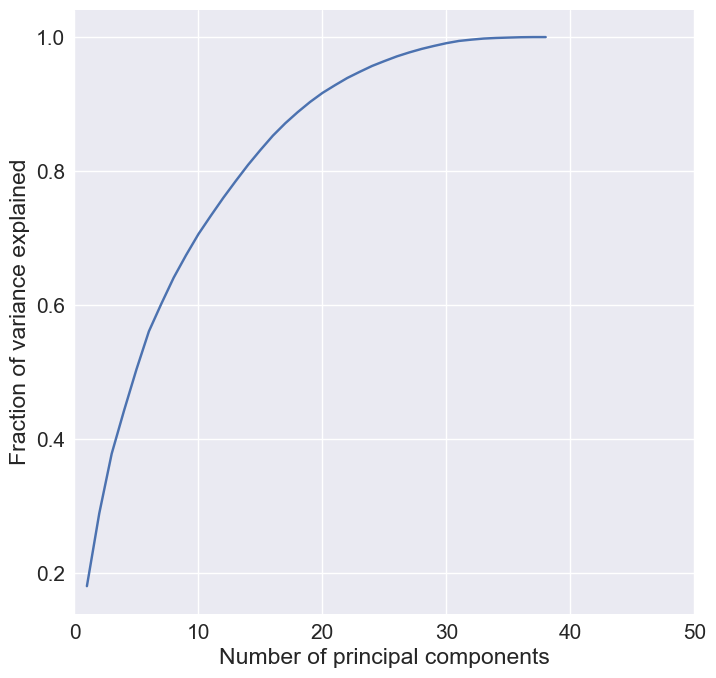

In [25]:
# Do PCA and look at variance explained
fig = plt.figure(figsize=(8,8),dpi=100)

pca = PCA()
pca.fit(df.values)
n_features = df.shape[1]
plt.plot(range(1,n_features+1),pca.explained_variance_ratio_.cumsum())
plt.xlim(0,50);
plt.xlabel('Number of principal components')
plt.ylabel('Fraction of variance explained');

In [26]:
# THe transformed values, ordered from highest to lowest variance dimensions
transformed = pca.transform(df.values)


#model_idx = [idx for idx in enumerate(df.index.values) if type(idx)==str]
'''
#label_model_no_trans_df
model_no_trans_df.index.name = 'Cell_ID'
model_df = model_no_trans_df.copy()
model_df.index.name = 'Cell_ID'
'''
# make experiment dataframe
experiment_idx = [idx for idx in df.index.values if type(idx)==int]
model_no_trans_df = df[~df.index.isin(experiment_idx)]
experiment_idx_labels = [(i,idx) for i,idx in enumerate(df.index.values) if type(idx)==int]

#model_df
#df.labels
model_no_trans_df
experiment_idx_labels = [i[0] for i in experiment_idx_labels]
experiment_idx_labels
model_no_trans_df
model_index_labels = ~df.index.isin(experiment_idx)

model_index_labels


new_models = df.head(7).index.tolist()#  list(range(0,9))#idx for idx in df.index.values if type(idx)==str]
new_model_labels= df.index.isin(new_models)

# The Dimensionality reduction assists human visual system classification

It is possible for the human visual system to see three clusters of cell data points.

Let's show that we can classify in this low dimensional space (by just using two features). We will slowly build up to classification via first applying Kmeans, to visualize cluster centres.
And then move on to using a random forest approach to actually visualizing decision boundaries.

In [27]:

isomap = Isomap(n_components=2)
isomap.fit(df.values)
iso = isomap.embedding_.T

# In the slide below:
You can see a plot of the high dimensional Druckman feature space projected into a low dimensional space using rotation matrices found via 
a regular PCA algorithm (not TSNE-PCA, which uses spatial embedding). 

One disadvantage of using 

PCA uses rotation matrices used to project the data into into the direction in which variance in the data is maximum. One disadvantage of this approach is that the two synthetic dimensions, that have the highest variance explained are hard to relate back to a just a few of the original Druckman dimensions. 

In order to circumvent this problem we will use the variance-explained feature of "Random Forest" classification algorithm. Random Forest variance explained, will probably hint at which dimensions comprize the greatest eigenvalues/weights of the PCA algorithm.

<Figure size 432x288 with 0 Axes>

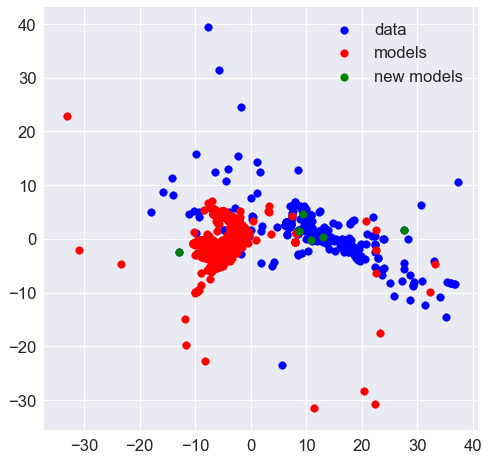

In [28]:
# Do an isomap embedding in 2 dimensions

# Plot that isomap embedding. Each is a model (or a cell, for data)
#plt.scatter(iso);
plt.clf()
fig = plt.figure(figsize=(7,7),dpi=80)
ax = plt.subplot(111)

plt.scatter(iso[0,experiment_idx_labels],iso[1,experiment_idx_labels],c='blue',cmap='rainbow',label='data')
plt.scatter(iso[0,model_index_labels],iso[1,model_index_labels],c='red',cmap='rainbow',label='models')
plt.scatter(iso[0,new_model_labels],iso[1,new_model_labels],c='green',cmap='rainbow',label='new models')
legend = ax.legend()#handles, labels, loc="upper right", title="Sizes")
# I don't love the isomap fit

In [29]:

from sklearn.cluster import KMeans
est = KMeans(n_clusters=2)
est.fit(iso.T)
y_kmeans = est.predict(iso.T)
centers = est.cluster_centers_


Another plot but with Kmeans cluster centers included.
Showing the cluster centres is a first step towards showing that machine classification on the dimension reduced version of the Druckman data feature space.

In the plot below the two large yellow dots are the cluster centres for ***(left models),*** ***(right data)***. The Euclidian distnace from each data point from a cluster centre is directly proportional too which category the data point is from (ie model or data, ie red/blue). This visualization would assist us to understand using KMeans nearist neighbours classification algorithm to classify the data.


IN a Random Forest Classification Analysis performed much further below we  examine the dimension that contributes the most to cluster seperation by looking at variance explained. This gives us an educated guess about dimensions that contribute the most weight to the axis of the PCA projection spaces plotted above.

It is likely that the axis in the PCA plot below, are strongly aligned with "Input Resistance" in models and data, as well as "AP2RateOfChangePeakToTroughTest". This second dimension means considering multi-spiking waveforms observed in models and data, at the second Action Potential/Spike, how rapid is the decay from peak to trough of the second AP wave.

<Figure size 432x288 with 0 Axes>

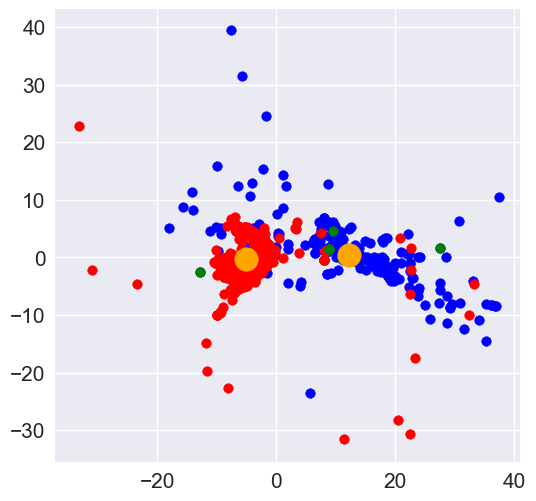

In [30]:

plt.clf()
fig = plt.figure(figsize=(6,6),dpi=100)
ax = plt.subplot(111)
plt.scatter(iso[0,experiment_idx_labels],iso[1,experiment_idx_labels],c='blue',cmap='rainbow',label='data')
plt.scatter(iso[0,model_index_labels],iso[1,model_index_labels],c='red',cmap='rainbow',label='models')
plt.scatter(iso[0,new_model_labels],iso[1,new_model_labels],c='green',cmap='rainbow',label='new models')
plt.scatter(centers[0][0],centers[0][1], s=290, c='orange',edgecolors='orange')
plt.scatter(centers[1][0],centers[1][1], s=290, c='orange',edgecolors='orange')


<Figure size 432x288 with 0 Axes>

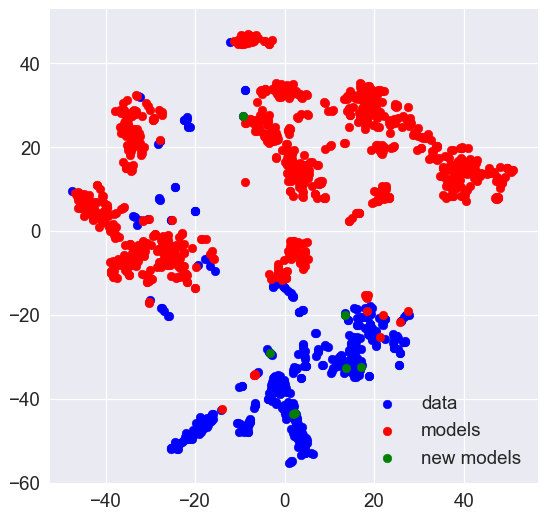

In [31]:
# Do a TSNE embedding in two dimensions
tsne = TSNE(n_components=2, perplexity=30)
tsne.fit(df.values)
x = tsne.embedding_.T
#np.shape(x)
#print(experiment_idx)
# Plot that TSNE embedding. Each is a model (or a cell, for data)
plt.clf()
fig = plt.figure(figsize=(7,7),dpi=90)
ax = plt.subplot(111)
plt.scatter(x[0,experiment_idx_labels],x[1,experiment_idx_labels],c='blue',cmap='rainbow',label='data')
plt.scatter(x[0,model_index_labels],x[1,model_index_labels],c='red',cmap='rainbow',label='models')
plt.scatter(x[0,new_model_labels],x[1,new_model_labels],c='green',cmap='rainbow',label='new models')

legend = ax.legend()#handles, labels, loc="upper right", title="Sizes")


# The figure above comes from a modern PCA variant called TSNE. 
You can understand TSNE as a subtype of PCA, which is better able to preserve details of spatial distributions in clusters, because it uses a type of "spatial embedding"

The TSNE plot does a better job of spatially sperating experimental data from theoretical models in dimension reduced Druckman feature space.




In [32]:
new_model_labels

array([ True,  True,  True, ..., False, False, False])

*Finally we  examine the dimension that contributes the most to cluster seperation by looking at variance explained. This gives us an educated guess about dimensions that contribute the most weight to the axis of the PCA projection spaces plotted above.


In [33]:

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

df_models = df[~df.index.isin(experiment_idx)]
df_data = df[df.index.isin(experiment_idx)]
# Assume they have the same columns

df_combined = pd.concat((df_data, df_models))

groundtruth = np.array(df.index.isin(experiment_idx))
rfc = RandomForestClassifier()
X = df_combined.values
rfc.fit(X, groundtruth)

importances = pd.Series(index = df_combined.columns, data=rfc.feature_importances_)
groundtruth[-9:-1]

print(importances.sort_values(ascending=False)[0:9])


AP1AHPDepthTest                    0.165349
InputResistanceTest                0.122867
AP1RateOfChangePeakToTroughTest    0.119323
AP2AHPDepthTest                    0.115099
AP2RateOfChangePeakToTroughTest    0.087473
AP1AmplitudeTest                   0.085374
ISIBurstMeanChangeTest             0.074500
ISICVTest                          0.066915
AP2WidthPeakToTroughTest           0.060670
dtype: float64


As I wrote above Random Forest Variance explained, tells us the dimensions of the Druckman feature space that most strongly assist in classifying models versus data. When we identify features that seperate models and data using Variance Explained, we are then able to iteratively variables that contribute more heavily to data variance. We can remove variables that explain most variance, until machine classification can no longer tell models and data apart, leaving us with a small list of tests which models need to perform better on, these tests correspond to measurable electrical properties of cells that need to be better aligned with data.

Two such measurable electrical properties are Druckman features with high variance explained are re: "Input Resistance" in models and data, as well as "AP2RateOfChangePeakToTroughTest". This second dimension called AP2RateOfChangePeakToTroughTest means: when considering multi-spiking waveforms observed, at the second Action Potential/Spike, how rapid is the average decay from peak to trough of the second AP wave. Since Action Potential wave attack and decay shapes are non-linear, the instantaneous gradient from the peak of the wave is not informative, and it is more useful to measure the time interval needed needed for a decay from a spike, to a state of hyperpolarization, corresponding to a neurons "refractory-period".

Already, we are have arrived at useful information, pertaining to the point of the exercise, as we now have a small list of electrical tests, that we want optimized models to perform better on, such that models and data will be more aligned with each other.

As neural modelers with a great interest in mimicing a diverse range of experimental data using models. The least convincing aspects of our models as mimics of data, are these top ten features. In other words the least convincing aspects of our models are: AP2RateOfChangePeakToTroughTest, Input Resistance values (a scalar), and the amplitude of the first and second spike.





# Prediction Results When we use Random Forests on all 48 Druckman dimensions
* remember that our ground truth labels are booleans that are defined like this:
groundtruth = np.array(df_combined.index.isin(experiment_idx))
Which is labeled as "True" for this data point is an experiment, and "False" for this data point is a model.
Machine classification can successfuly discrimate that our optimized cells are models and not data (this is bad news for us).

In this context in order to bolster out optimized models, a high ***false-negative*** rate is desirable. Unfortunately for us, that is not what we see. The Random Forest Classifier (RFC) correctly identies that all 11 of the new optimized cells are not derived from experiments (they are models). That is bad news for us.


In [39]:
df_combined = df_combined.fillna(0).applymap(f)

test_frame = test_frame.fillna(0).applymap(f)

rfc = RandomForestClassifier()
X = df_combined.values
rfc.fit(X, groundtruth)
predictions = rfc.predict(test_frame.values)
print(len(test_frame.values))
print(predictions)


11
[False False False False False False False False False False False]


In [ ]:
rfc = RandomForestClassifier()
fig = plt.figure(figsize=(9,9),dpi=110)

X = x.T

rfc.fit(x.T, groundtruth)
h = .02  # step size in the mesh
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
Z = rfc.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)


In [ ]:
tsne.fit(test_frame)
xt = tsne.embedding_.T
predictions = rfc.predict(xt.T)
print(predictions)

Now we have fitted a RFC using only two articial dimensions eminating from PCA rotation vectors that provide us with 2D projection space.
# Interpretation, what does this list of Booleans mean?
Unfortunately for the author (whose aim is to bolster the validity of the new optimized models).

When we feed in the new optimized models as "validation data", in this context, the RFC is still okay at classifying our new models correctly as models, and not data. However, the RFC performance is significanlty worse, as the optimized cells have tricked the RFC ***4*** times.

Also since the output of the TSNE-PCA varies with each run, as it is seeded with a psuedo random numnber generator, the projection space that the RFC acts on is different each time. Meaning that the ***FPR*** and the ***TPR*** rates vary slightly on each run.


# In the plot below we show the we show the decision boundary as used by our classifier.
The decision boundary llows us to see if the newer optimized models are classified as data or models



In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
fig = plt.figure(figsize=(8,8),dpi=90)

#n_neighbors = 15

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(x[0,new_model_labels],x[1,new_model_labels], s=200, c='red',edgecolors='blue')
plt.scatter(x[0,experiment_idx_labels],x[1,experiment_idx_labels],c='blue',cmap='rainbow',label='data')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()



* Blue means experimental data, red means model, as machine categorized using Random Forests.
# The above figure allows us
To argue that the newer optimized models are closer to cluster centres and often fall on the experimental data side of the decision boundary.


In [ ]:
groundtruth
predictions = rfc.predict(X)
print(np.shape(predictions))


In [ ]:
df_combined.tail()

# Lets switch back to using all 38 features to classify
Only as its easier for me to debug, and I can make progress more quickly.
Using cross validation below you can see that this approach is generalizable.

In [ ]:
#new_models = df.head(7).index.tolist()

#predictions = rfc.predict(df.head(7).values)

#df_combined.columns
from sklearn import metrics

In [ ]:
#!pip install --update sklearn

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_combined.values, groundtruth, test_size=0.33, random_state=42)    

rfc = RandomForestClassifier()
#X = df_combined.values
rfc.fit(X_train, y_train)
predictions = rfc.predict(X_test)
for i,j in enumerate(predictions):
    if j!=y_test[i]:
        print(j,y_test[i],i)
    
#print(y_test[291],'these are the data/models that resist classification')
#print(y_test[340],'these are the data/models that resist classification')

In [ ]:
score = metrics.f1_score(y_test, predictions)


# In the python code below...
We are not interested so much in the main research question, of "are the new optimized cells, better mimics of data".
We are more interested in a secondary question: "Was our comparison of models and data fair?, and Did we use do our best to utilize the full potential of machine classification, in sensing the differences between models and data.

To answer that question we assess the accuracy of RandomForest Classifier as applied to the high dimensional Druckman space.


In [ ]:
def incomplete():
    import numpy as np, pylab as pl
    # get overall accuracy and F1 score to print at top of plot
    pscore = metrics.accuracy_score(y_test, predictions)
    pred=predictions
    # get size of the full label set
    dur = 2#len(categories)
    print("Building testing confusion matrix...")
    # initialize score matrices
    trueScores = np.zeros(shape=(dur,dur))
    predScores = np.zeros(shape=(dur,dur))
    # populate totals
    categories = ["models","data"]
    for i in range(len(y_test)-1):
      trueIdx = y_test[i]
      predIdx = pred[i]
      trueScores[trueIdx,trueIdx] += 1
      predScores[trueIdx,predIdx] += 1
    # create %-based results
    trueSums = np.sum(trueScores,axis=0)
    conf = np.zeros(shape=predScores.shape)
    for i in range(len(predScores)):
      for j in range(dur):
        conf[i,j] = predScores[i,j] / trueSums[i]
    # plot the confusion matrix
    hq = pl.figure(figsize=(15,15));
    aq = hq.add_subplot(1,1,1)
    aq.set_aspect(1)
    res = aq.imshow(conf,cmap=pl.get_cmap('Greens'),interpolation='nearest',vmin=-0.05,vmax=1.)
    width = len(conf)
    height = len(conf[0])
    done = []
    # label each grid cell with the misclassification rates
    for w in range(width):
      for h in range(height):
          pval = conf[w][h]
          c = 'k'
          rais = w
          if pval > 0.5: c = 'w'
          if pval > 0.001:
            if w == h:
              aq.annotate("{0:1.1f}%\n{1:1.0f}/{2:1.0f}".format(pval*100.,predScores[w][h],trueSums[w]), xy=(h, w), 
                      horizontalalignment='center',
                      verticalalignment='center',color=c,size=10)
            else:
              aq.annotate("{0:1.1f}%\n{1:1.0f}".format(pval*100.,predScores[w][h]), xy=(h, w), 
                      horizontalalignment='center',
                      verticalalignment='center',color=c,size=10)
    # label the axes
    pl.xticks(range(width), categories[:width],rotation=90,size=10)
    pl.yticks(range(height), categories[:height],size=10)
    # add a title with the F1 score and accuracy
    aq.set_title( " Prediction, Test Set (f1: "+"{0:1.3f}".format(score)+', accuracy: '+'{0:2.1f}%'.format(100*pscore)+", " + str(len(y_test)) + " items)",fontname='Arial',size=10,color='k')
    aq.set_ylabel("Actual",fontname='Arial',size=10,color='k')
    aq.set_xlabel("Predicted",fontname='Arial',size=10,color='k')
    pl.grid(b=True,axis='both')

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC


import numpy as np
from scipy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.model_selection import StratifiedKFold

def plot_roc_curve(X_train, y_train,X_test):
    rfc = RandomForestClassifier()
    rfc.fit(X_train, y_train)
    #y_score = rfc.fit(X_test, y_train)
    
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    #roc_auc = dict()
    #for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    plt.figure()
    lw = 2
    plt.plot(fpr[2], tpr[2], color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()    
        
        #roc_auc[i] = auc(fpr[i], tpr[i])
def incomplete_2():
        
    X = df_combined.values
    y = groundtruth
    n_samples, n_features = X.shape

    # Add noisy features
    random_state = np.random.RandomState(0)
    X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

    # #############################################################################
    # Classification and ROC analysis

    # Run classifier with cross-validation and plot ROC curves
    cv = StratifiedKFold(n_splits=6)
    classifier = svm.SVC(kernel='linear', probability=True,
                         random_state=random_state)

    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots()
    for i, (train, test) in enumerate(cv.split(X, y)):
        rfc = RandomForestClassifier()
        rfc.fit(X[train], y[train])
        score = rfc.predict(X[train])
        # Compute ROC curve and ROC area for each class
        fpr = dict()
        tpr = dict()
        fpr[i], tpr[i], _ = roc_auc_score(y_test[:, i], y_score[:, i])
        interp_tpr = interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
            label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
            label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
            lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                    label=r'$\pm$ 1 std. dev.')

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
           title="Receiver operating characteristic example")
    ax.legend(loc="lower right")
    plt.show()

# This will enable us to use a cross-validation Approach.
Cross-validation will help us to check the generalizability of our model, by better navigating the bias-variance tradeoff.

In [ ]:
print('448-458 are models that we are happy were misclassified as data')    
#here = np.array(df_combined.values)
predictions = rfc.predict(here)
ground_truth = groundtruth
#for i,pred in enumerate(predictions):
for j,(i, row) in enumerate(df_combined.iterrows()):
    #unique_id = i
    if predictions[j]:
        print(i,'this is an experiment:',predictions[j],j,groundtruth[j])
    else:
        print(i,'this is an model:',False==predictions[j],j,groundtruth[j])

    


In [ ]:
# PLay around with the value of perplexity. Recommended values are between 5 and 50.  
#See if any of the clusters that pop out mean anything (do they match existing cell type clusters?  
# Do they match known firnig patterns?  
# Where does the data fit in when it is also plotted in this space?)

perplexities = [25,30,35,40]

fig, ax = plt.subplots(2,2,figsize=(8,12),dpi=300)
ax = ax.ravel()

for i, perp in enumerate(perplexities):

    # init = 'pca' or 'random'
    tsne = TSNE(n_components=2,
                init='random',      
                random_state=0,
                perplexity=perp,         # default = 30, should be less than the number of samples
                n_iter=1000)             # default = 1000


    %time tsne.fit(df.values) # can't use transpose


    ax[i].scatter(*tsne.embedding_.T);

    if i in [2,3]:
        ax[i].set_xlabel('TSNE-1')

    if i in [0,2]:
        ax[i].set_ylabel('TSNE-2')
    ax[i].set_title('Perplexity = %s' %perp)

### Repeat above with just experimental data

In [ ]:
# make model dataframe
model_idx = [idx for idx in df.index.values if type(idx)==str]
model_no_trans_df = df[df.index.isin(model_idx)]
model_no_trans_df.index.name = 'Cell_ID'
model_df = model_no_trans_df.copy()
model_df.index.name = 'Cell_ID'

# make experiment dataframe
experiment_idx = [idx for idx in df.index.values if type(idx)==int]
experiment_no_trans_df = df[df.index.isin(experiment_idx)]
experiment_df = experiment_no_trans_df.copy()
experiment_df

In [ ]:
model_df[:] = ss.fit_transform(model_no_trans_df.values);

In [ ]:
model_no_trans_df.head()

In [ ]:
model_df.head()

In [ ]:
# PLay around with the value of perplexity. Recommended values are between 5 and 50.  
#See if any of the clusters that pop out mean anything (do they match existing cell type clusters?  
# Do they match known firnig patterns?  
# Where does the data fit in when it is also plotted in this space?)

perplexities = [25,30,35,40]

df = model_df.copy()

fig, ax = plt.subplots(2,2,figsize=(8,12))
ax = ax.ravel()

for i, perp in enumerate(perplexities):

    # init = 'pca' or 'random'
    tsne = TSNE(n_components=2,
                init='random',      
                random_state=0,
                perplexity=perp,         # default = 30, should be less than the number of samples
                n_iter=1000)             # default = 1000


    %time tsne.fit(df.values) # can't use transpose


    ax[i].scatter(*tsne.embedding_.T);

    if i in [2,3]:
        ax[i].set_xlabel('TSNE-1')

    if i in [0,2]:
        ax[i].set_ylabel('TSNE-2')
    ax[i].set_title('Perplexity = %s' %perp)

In [ ]:
try:
    os.mkdir('data')
except:
    pass
filename = os.path.join(path2data,'new_cortical_ephys.csv')

model_df.to_csv(filename)

filename = os.path.join(path2data,'new_cortical_ephys_no_trans.csv')
model_no_trans_df.to_csv(filename)

filename = os.path.join(path2data,'experiment_ephys_no_trans.csv')
experiment_no_trans_df.to_csv(filename)